<h1><font color = 'red'> <center>CVEN 5370 GIS Apps in Engineering: Assignment 4</h1>
<h3><font color = 'blue'> <center>Shaseevarajan Sivanantharajah</h3>

<h3>Problem Statement

The goal is to create a logistic regression model for predicting bridge condition (susceptibility to failure). We shall use Age, ADT, Material, Reconstruct as our **independant variable**. We shall recode the lowest bridge rating as 0 (satisfactory) and 1 (unsatisfactory) using the following scale rating between [0-5] (1 or unsatisfactory) otherwise satisfactory.

**WORK FLOW**
1. Read the 2024 data
2. Create a latitudeDD and longitudeDD for plotting
3. Create a FID (lat_long)
4. Clean or remove duplicates
5. Recode the lowest ratings as binary variables
6. Compute age
7. Extract the required variables into a new dataframe
8. Perform train-test split
9. Fit the model on the training data
10. Evaluate the model on the training data
11. Read the 2025 data
12. Create a new FID using the same concept as in step 3
13. Extract unique bridges in 2025
14. Make prediction using the model fit in step 9 and compare
15. Make plots and maps for visualization and analysis

**Code**

In [418]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [419]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt
import shapely

In [420]:
#Function to parse Lat Long
def parsell (val,lat =True):  #parsell is a name we gave
    s = str(val)
    if(len(s)==8):
        deg = int(s[:2])
        mins = int(s[2:4])
        sec = int(s[4:])/100
    else:
        deg = int(s[:3])
        mins = int(s[3:5])
        sec = int(s[5:])/100
    dd = deg + mins/60 + sec/3600
    if(lat == True):
        dd=dd
    else:
        dd = -1*dd
    return(dd)

In [421]:
parsellv = np.vectorize(parsell)

In [422]:
path = "/home/vu1/Shaseevarajan Sivanantharajah/Assignment4"
os.chdir(path)

In [423]:
fname = "2024Data.csv"
a = pd.read_csv(fname, on_bad_lines="skip",dtype ="str") 
a.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA
0,48,0000000L2015318,1,6,4,00000,0,00,375,00000,...,Y,7,200,2035,NaN,Y,68,F,6,169.84
1,48,000021521-00101,1,6,0,00000,0,02,071,00000,...,Y,8,1,2042,NaN,Y,63,F,6,150.72
2,48,000021521-00181,1,6,0,00000,0,02,071,00000,...,Y,8,1,2042,NaN,Y,63,G,7,74.4
3,48,000021521-TMP20,1,6,1,00000,0,02,071,00000,...,Y,8,150,2042,NaN,Y,63,G,7,91.91
4,48,000021525-00012,1,6,0,00000,0,02,245,00000,...,Y,8,120,2042,NaN,Y,63,P,4,204.3


In [424]:
a.columns

Index(['STATE_CODE_001', 'STRUCTURE_NUMBER_008', 'RECORD_TYPE_005A',
       'ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'ROUTE_NUMBER_005D',
       'DIRECTION_005E', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003',
       'PLACE_CODE_004',
       ...
       'BRIDGE_LEN_IND_112', 'SCOUR_CRITICAL_113', 'FUTURE_ADT_114',
       'YEAR_OF_FUTURE_ADT_115', 'MIN_NAV_CLR_MT_116', 'FED_AGENCY',
       'SUBMITTED_BY', 'BRIDGE_CONDITION', 'LOWEST_RATING', 'DECK_AREA'],
      dtype='object', length=123)

In [425]:
a['FID']= a.LAT_016.astype(str)+"_"+a.LONG_017.astype(str)
a['FID']

0        35185702_101560762
1        29362100_094272880
2        29362940_094254920
3        29365160_094324020
4        29413300_094044860
                ...        
56724    31495329_106183492
56725    32430233_096561253
56726    32424987_096560305
56727    32424560_096561340
56728    29283700_098252680
Name: FID, Length: 56729, dtype: object

In [426]:
a.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,FID
0,48,0000000L2015318,1,6,4,00000,0,00,375,00000,...,7,200,2035,NaN,Y,68,F,6,169.84,35185702_101560762
1,48,000021521-00101,1,6,0,00000,0,02,071,00000,...,8,1,2042,NaN,Y,63,F,6,150.72,29362100_094272880
2,48,000021521-00181,1,6,0,00000,0,02,071,00000,...,8,1,2042,NaN,Y,63,G,7,74.4,29362940_094254920
3,48,000021521-TMP20,1,6,1,00000,0,02,071,00000,...,8,150,2042,NaN,Y,63,G,7,91.91,29365160_094324020
4,48,000021525-00012,1,6,0,00000,0,02,245,00000,...,8,120,2042,NaN,Y,63,P,4,204.3,29413300_094044860


In [427]:
aa = a[~a.duplicated(subset=['FID'], keep = False)].copy() #removing duplicates in same lat long

In [428]:
len(aa)

56571

In [429]:
aa.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,FID
0,48,0000000L2015318,1,6,4,00000,0,00,375,00000,...,7,200,2035,NaN,Y,68,F,6,169.84,35185702_101560762
1,48,000021521-00101,1,6,0,00000,0,02,071,00000,...,8,1,2042,NaN,Y,63,F,6,150.72,29362100_094272880
2,48,000021521-00181,1,6,0,00000,0,02,071,00000,...,8,1,2042,NaN,Y,63,G,7,74.4,29362940_094254920
3,48,000021521-TMP20,1,6,1,00000,0,02,071,00000,...,8,150,2042,NaN,Y,63,G,7,91.91,29365160_094324020
4,48,000021525-00012,1,6,0,00000,0,02,245,00000,...,8,120,2042,NaN,Y,63,P,4,204.3,29413300_094044860


In [430]:
aa['LOWEST_RATING']

0        6
1        6
2        7
3        7
4        4
        ..
56724    7
56725    6
56726    5
56727    6
56728    7
Name: LOWEST_RATING, Length: 56571, dtype: object

In [431]:
print(aa["LOWEST_RATING"].dtype)

object


In [432]:
aa["LOWEST_RATING"].describe

<bound method NDFrame.describe of 0        6
1        6
2        7
3        7
4        4
        ..
56724    7
56725    6
56726    5
56727    6
56728    7
Name: LOWEST_RATING, Length: 56571, dtype: object>

In [433]:
len(aaf)

56571

In [434]:
#Create lat Long
latx = aa.loc[:,["LAT_016"]]
aa.loc[:,"LATDD"]= parsellv(latx,lat = True)

In [435]:
longx = aa.loc[:,["LONG_017"]]
aa.loc[:,"LONDD"]= parsellv(longx,lat = False)

In [436]:
aa.LATDD

0        35.315839
1        29.605833
2        29.608167
3        29.614333
4        29.692500
           ...    
56724    31.831469
56725    32.717314
56726    32.713853
56727    32.712667
56728    29.476944
Name: LATDD, Length: 56571, dtype: float64

In [437]:
aa.LONDD

0       -101.935450
1        -94.458000
2        -94.430333
3        -94.544500
4        -94.080167
            ...    
56724   -106.309700
56725    -96.936814
56726    -96.934181
56727    -96.937056
56728    -98.424111
Name: LONDD, Length: 56571, dtype: float64

In [438]:
aa.LOWEST_RATING.describe()

count     56571
unique       10
top           7
freq      27960
Name: LOWEST_RATING, dtype: object

In [439]:
aa.LOWEST_RATING.unique()

array(['6', '7', '4', '8', '3', '5', '9', '2', '1', '0'], dtype=object)

In [440]:
Rat = aa.loc[:,["LOWEST_RATING"]].astype(int)
aa["UNSAFE"] = np.where(Rat<6,1,0)

In [441]:
aa.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,FID,LATDD,LONDD,UNSAFE
0,48,0000000L2015318,1,6,4,00000,0,00,375,00000,...,NaN,Y,68,F,6,169.84,35185702_101560762,35.315839,-101.935450,0
1,48,000021521-00101,1,6,0,00000,0,02,071,00000,...,NaN,Y,63,F,6,150.72,29362100_094272880,29.605833,-94.458000,0
2,48,000021521-00181,1,6,0,00000,0,02,071,00000,...,NaN,Y,63,G,7,74.4,29362940_094254920,29.608167,-94.430333,0
3,48,000021521-TMP20,1,6,1,00000,0,02,071,00000,...,NaN,Y,63,G,7,91.91,29365160_094324020,29.614333,-94.544500,0
4,48,000021525-00012,1,6,0,00000,0,02,245,00000,...,NaN,Y,63,P,4,204.3,29413300_094044860,29.692500,-94.080167,1


In [442]:
sum(aa.UNSAFE)

4818

In [443]:
len(aa)

56571

**Age Calculation**

In [444]:
#YEARS_BUILT_027
#YEARS_RECONSTRUCTED_106
yrb = pd.to_numeric(aa.YEAR_BUILT_027, errors ="coerce")
yrc = pd.to_numeric(aa.YEAR_RECONSTRUCTED_106, errors ="coerce")
age = 2024 - np.maximum(yrb,yrc)
age

0        16.0
1        19.0
2        19.0
3        12.0
4        17.0
         ... 
56724    11.0
56725     NaN
56726     NaN
56727     NaN
56728     NaN
Length: 56571, dtype: float64

In [445]:
aa.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,FID,LATDD,LONDD,UNSAFE
0,48,0000000L2015318,1,6,4,00000,0,00,375,00000,...,NaN,Y,68,F,6,169.84,35185702_101560762,35.315839,-101.935450,0
1,48,000021521-00101,1,6,0,00000,0,02,071,00000,...,NaN,Y,63,F,6,150.72,29362100_094272880,29.605833,-94.458000,0
2,48,000021521-00181,1,6,0,00000,0,02,071,00000,...,NaN,Y,63,G,7,74.4,29362940_094254920,29.608167,-94.430333,0
3,48,000021521-TMP20,1,6,1,00000,0,02,071,00000,...,NaN,Y,63,G,7,91.91,29365160_094324020,29.614333,-94.544500,0
4,48,000021525-00012,1,6,0,00000,0,02,245,00000,...,NaN,Y,63,P,4,204.3,29413300_094044860,29.692500,-94.080167,1


In [446]:
aa = aa.loc[aa["LATDD"]>25]
aa.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,FID,LATDD,LONDD,UNSAFE
0,48,0000000L2015318,1,6,4,00000,0,00,375,00000,...,NaN,Y,68,F,6,169.84,35185702_101560762,35.315839,-101.935450,0
1,48,000021521-00101,1,6,0,00000,0,02,071,00000,...,NaN,Y,63,F,6,150.72,29362100_094272880,29.605833,-94.458000,0
2,48,000021521-00181,1,6,0,00000,0,02,071,00000,...,NaN,Y,63,G,7,74.4,29362940_094254920,29.608167,-94.430333,0
3,48,000021521-TMP20,1,6,1,00000,0,02,071,00000,...,NaN,Y,63,G,7,91.91,29365160_094324020,29.614333,-94.544500,0
4,48,000021525-00012,1,6,0,00000,0,02,245,00000,...,NaN,Y,63,P,4,204.3,29413300_094044860,29.692500,-94.080167,1


In [447]:
aa.describe()

,LATDD,LONDD,UNSAFE
count,56570.000000,56570.000000,56570.000000
mean,31.224550,-97.512845,0.085169
std,1.815607,2.262591,0.279135
min,25.873389,-106.618869,0.000000
25%,29.800444,-98.434671,0.000000
50%,31.267235,-97.160800,0.000000
75%,32.744215,-95.970334,0.000000
max,36.482353,-93.520178,1.000000


<Axes: >

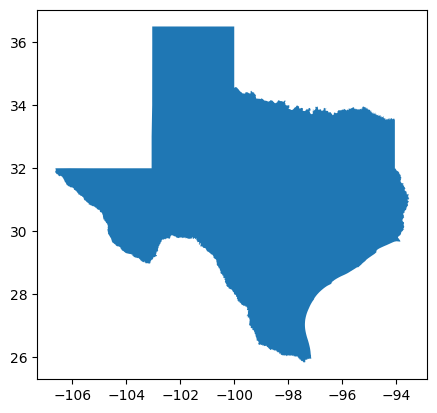

In [448]:
txfile = "TXdissolved.gpkg"
txbnd = gpd.read_file(txfile)
txdis = txbnd.dissolve().to_crs(4326) #bring it to same projection
txdis.plot()

In [449]:
bridges = gpd.GeoDataFrame(aa,crs="EPSG:4326", 
                           geometry =gpd.points_from_xy(aa["LONDD"],aa["LATDD"]))

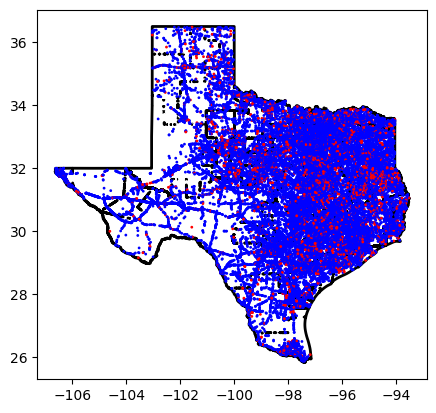

In [451]:
colormap = {0:"blue",1:"red"}
bridges["color"] = bridges['UNSAFE'].map(colormap)
fig,ax = plt.subplots()
txdis.plot(ax=ax,facecolor = "none", edgecolor = "black", linewidth =2)
bridges.plot(ax=ax,color = bridges["color"], markersize = 1)
plt.show()